# Part 1: The Graviational Potential of the Earth

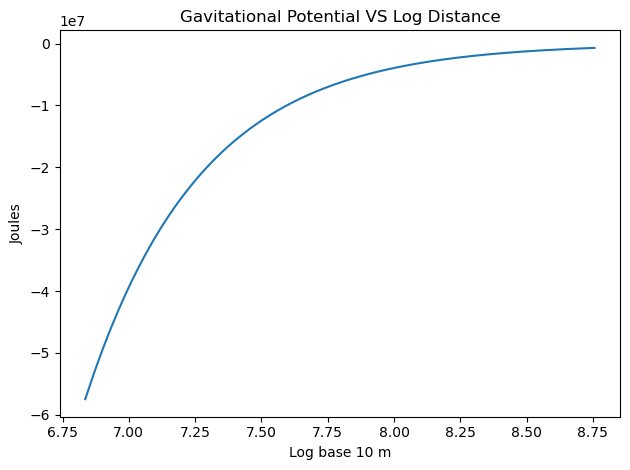

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.cbook as cbook
import matplotlib.colors as colors
import matplotlib.ticker as ticker
import scipy.integrate as integrate
nx  = 1000
M = 5.9*10**24 #Kg
xm,ym = (0,0)
Dem = 3.8*(10**8)
x_eval = np.linspace(1,Dem*1.5, nx)
y_eval = np.zeros(nx)


G = 6.67*10**(-11)
Re = 6378*1000

def phi(G,M,x,y,xm,xy,R):
    r = np.sqrt((x-xm)**2 +(y-ym)**2)
    if r<R:
        phi = np.nan
    else:
        phi =  -G*M/r
    return phi

vecpot = np.vectorize(phi)
grav_pot = vecpot(G,M,x_eval,y_eval,xm,ym,Re)

fig, ax = plt.subplots(1,1)
plot = ax.plot(np.log10(x_eval), grav_pot)
ax.set_xlabel("Log base 10 m")
ax.set_ylabel("Joules")
ax.set_title("Gavitational Potential VS Log Distance")
fig.tight_layout()

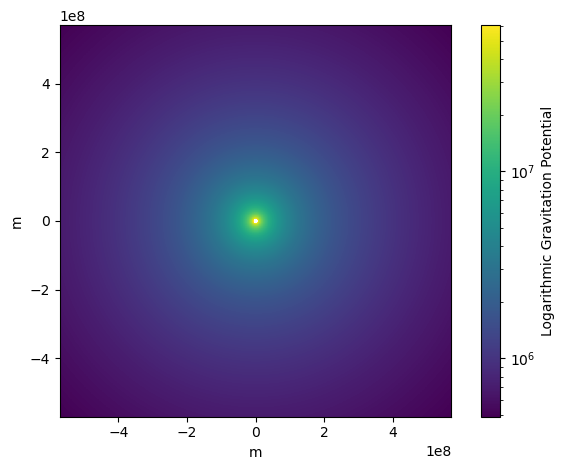

In [91]:
x_mesh = np.linspace(-Dem*1.5,Dem*1.5, nx)
y_mesh = np.linspace(-Dem*1.5,Dem*1.5, nx)

x_grid, y_grid = np.meshgrid(x_mesh, y_mesh)

z = vecpot(G,M,x_grid,y_grid,xm,xm,Re)
log_z = np.log(-z)
fig2, ax2 = plt.subplots(1,1)
mesh = ax2.pcolormesh(x_grid, y_grid, -z, norm = colors.LogNorm(vmin = np.nanmin(-z), vmax = np.nanmax(-z)))
ax2.set_aspect("equal")

cbar = fig2.colorbar(mesh)
cbar.set_label("Logarithmic Gravitation Potential")
ax2.set_xlabel("m")
ax2.set_ylabel("m")
fig2.tight_layout()

## Part 2: The Gravitational Potential of the Earth-Moon System

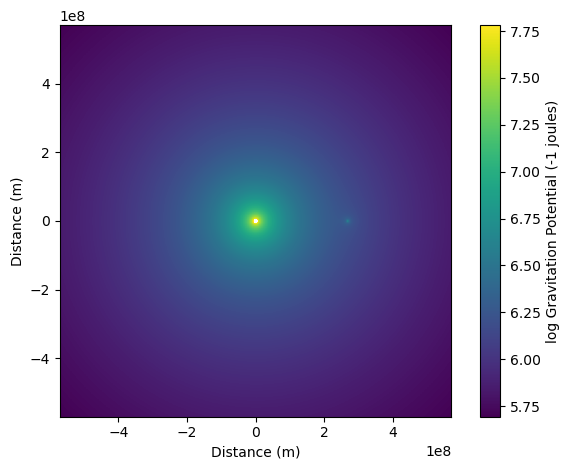

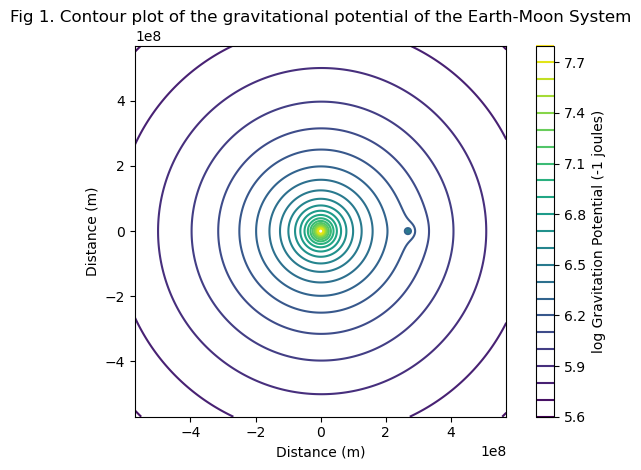

In [99]:
Rm = 1727*1000
M_moon = 7.3*10**22

phi_earth = vecpot(G,M,x_grid,y_grid,0,0,Re)

x_moon = Dem/(np.sqrt(2))
y_moon = Dem/(np.sqrt(2))
phi_moon = vecpot(G,M_moon,x_grid,y_grid,x_moon,y_moon,Rm)

phi_tot = phi_earth + phi_moon

log_phi_tot = np.log10(-phi_tot)

fig3, ax3 = plt.subplots(1,1)
mesh2 = ax3.pcolormesh(x_grid, y_grid, log_phi_tot) # norm = colors.LogNorm(vmin = np.nanmin(-phi_tot), vmax = np.nanmax(-phi_tot))
ax3.set_aspect("equal")
colours = np.log(-phi_tot)
cbar = fig3.colorbar(mesh2)
cbar.set_label("log Gravitation Potential (-1 joules)")
ax3.set_xlabel("Distance (m)")
ax3.set_ylabel("Distance (m)")
fig3.tight_layout()

fig_contour, ax_contour = plt.subplots(1,1)
contours = ax_contour.contour(x_grid, y_grid, log_phi_tot, levels = 20) # levels= [1e6, 1.5e6, 2e6, 2.5e6, 3e6, 3.5e6, 4e6, 4.5e6, 5e6, 5.5e6, 6e6, 6.5e6, 7e6, 7.5e6, 8e6, 8.5e6, 9e6, 9.5e6, 1e7], norm = colors.LogNorm()
cbar2 = fig_contour.colorbar(contours)
cbar2.set_label("log Gravitation Potential (-1 joules)")
ax_contour.set_aspect("equal")
ax_contour.set_xlabel("Distance (m)")
ax_contour.set_ylabel("Distance (m)")
ax_contour.set_title("Fig 1. Contour plot of the gravitational potential of the Earth-Moon System")
fig_contour.tight_layout()
plt.savefig('contour.png')

## Part 3: The Gravitational Force Field of the Earth-Moon System

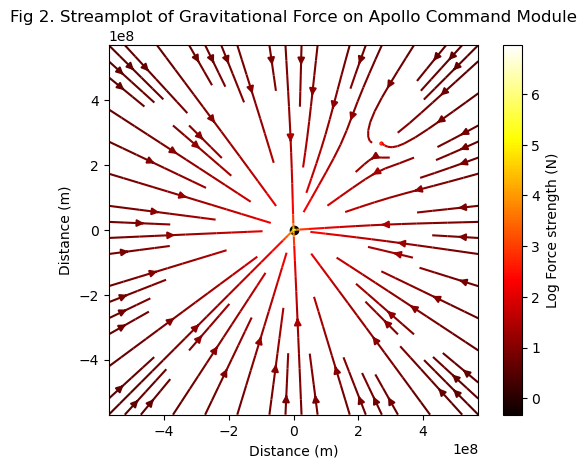

In [97]:
def grav_f(G, M1, M2, x_m, y_m, x_m2, y_m2):
    if np.isclose(x_m, x_m2) and np.isclose(y_m, y_m2):
        force_x = np.nan
        force_y = np.nan
    else:
        r_squared = (x_m2-x_m)**2 + (y_m2-y_m)**2
        vec_r = np.array([x_m2-x_m, y_m2-y_m])
        vec_r_hat = vec_r/np.linalg.norm(vec_r)
        force_x = -((G*M1*M2)/r_squared)*vec_r_hat[0]
        force_y = -((G*M1*M2)/r_squared)*vec_r_hat[1]
    return force_x, force_y

fig4, ax4 = plt.subplots(1,1)

ax4.plot((0), (0), "ko", markersize = 6)
ax4.plot((x_moon), (y_moon), "ro", markersize = 2)

Fx = np.zeros((nx,nx))
Fy = np.zeros((nx,nx))
M_apollo = 5500

for y in range(nx): #visit all y points (rows)
    for x in range(nx): #visit all x points (columnns)

        f_m1_x, f_m1_y = grav_f(G, M, M_apollo, 0, 0, x_grid[y,x], y_grid[y,x])

        f_m2_x, f_m2_y = grav_f(G, M_moon, M_apollo, x_moon, y_moon, x_grid[y,x], y_grid[y,x])

        #Updating the containers
        Fx[y,x] += (f_m1_x +f_m2_x)
        Fy[y,x] += (f_m1_y +f_m2_y)

colours1 = np.log10(np.hypot(Mx, My))

stream = ax4.streamplot(x_grid, y_grid, Fx, Fy, color = colours1, cmap = cm.hot, density = .8)

cbar1 = fig4.colorbar(stream.lines)
ax4.set_aspect("equal")
ax4.set_title("Fig 2. Streamplot of Gravitational Force on Apollo Command Module")
ax4.set_xlabel("Distance (m)")
ax4.set_ylabel("Distance (m)")

cbar1.set_label("Log Force strength (N)")
fig2.tight_layout()
plt.savefig('forces.png')

## Part 4: Altitude of the Saturn V Rocket

In [87]:
m0 = 2.8e6
m_f = 7.5e5
m_dot = 1.3e4
T = (m0 - m_f)/m_dot

print(f"The burnout time is {T:.2f} seconds")

def delta_v(t, ve, m0, m_f, m_dot, g):
    T = (m0 - m_f)/m_dot
    if t > T:
        m_t = m0 - m_dot*T
        del_v = ve*np.log(m0/m_t) - g*T
        print(f"Fuel expended at {T:.2f} seconds, so velocity remains at {del_v:1f} ms^-1")
    else:
        m_t = m0 - m_dot*t
        del_v = ve*np.log(m0/m_t) - g*t
    return del_v

ve = 2.4e3
g = 9.81

alt, err = integrate.quad(delta_v, 0, T, args = (ve, m0, m_f, m_dot, g))
print(f"The Burnout Altitude of the Saturn V rocket is {alt:.2f} m")
delta_v(T, ve, m0, m_f, m_dot, g)

The burnout time is 157.69 seconds
The Burnout Altitude of the Saturn V rocket is 74093.98 m


np.float64(1614.5620366575151)